In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, confusion_matrix, RocCurveDisplay
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Airlines.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539383 entries, 0 to 539382
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           539383 non-null  int64 
 1   Airline      539383 non-null  object
 2   Flight       539383 non-null  int64 
 3   AirportFrom  539383 non-null  object
 4   AirportTo    539383 non-null  object
 5   DayOfWeek    539383 non-null  int64 
 6   Time         539383 non-null  int64 
 7   Length       539383 non-null  int64 
 8   Delay        539383 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 37.0+ MB


Target variable is 'Delay' - binary variable - classification model

In [3]:
df.describe(include = 'all')

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
count,539383.00000,539383,539383.000000,539383,539383,539383.000000,539383.000000,539383.000000,539383.000000
unique,NaN,18,NaN,293,293,NaN,NaN,NaN,NaN
top,NaN,WN,NaN,ATL,ATL,NaN,NaN,NaN,NaN
freq,NaN,94097,NaN,34449,34440,NaN,NaN,NaN,NaN
mean,269692.00000,NaN,2427.928630,NaN,NaN,3.929668,802.728963,132.202007,0.445442
std,155706.60446,NaN,2067.429837,NaN,NaN,1.914664,278.045911,70.117016,0.497015
min,1.00000,NaN,1.000000,NaN,NaN,1.000000,10.000000,0.000000,0.000000
25%,134846.50000,NaN,712.000000,NaN,NaN,2.000000,565.000000,81.000000,0.000000
50%,269692.00000,NaN,1809.000000,NaN,NaN,4.000000,795.000000,115.000000,0.000000
75%,404537.50000,NaN,3745.000000,NaN,NaN,5.000000,1035.000000,162.000000,1.000000


In [4]:
df.isnull().sum()

id             0
Airline        0
Flight         0
AirportFrom    0
AirportTo      0
DayOfWeek      0
Time           0
Length         0
Delay          0
dtype: int64

In [5]:
df.value_counts()

id      Airline  Flight  AirportFrom  AirportTo  DayOfWeek  Time  Length  Delay
1       CO       269     SFO          IAH        3          15    205     1        1
359600  9E       3789    IAH          MEM        2          980   107     0        1
359598  OO       6423    EUG          PDX        2          979   37      0        1
359597  OH       6391    RDU          JFK        2          979   116     0        1
359596  DL       2189    PHL          DTW        2          979   121     0        1
                                                                                  ..
179791  YV       2845    PHX          YUM        6          670   59      0        1
179790  YV       2730    PHX          LGB        6          670   85      0        1
179789  YV       1053    OGG          LIH        6          670   45      0        1
179788  XE       3069    HRL          IAH        6          670   67      0        1
539383  US       1442    LAX          PHL        5          1439  301 

In [6]:
df['AirportFrom'].value_counts()

ATL    34449
ORD    24822
DFW    22154
DEN    19843
LAX    16657
       ...  
MMH       16
SJT       15
GUM       10
ADK        9
ABR        2
Name: AirportFrom, Length: 293, dtype: int64

In [7]:
df['DayOfWeek'].value_counts()

4    91445
3    89746
5    85248
1    72769
2    71340
7    69879
6    58956
Name: DayOfWeek, dtype: int64

In [8]:
df['Airline'].value_counts()

WN    94097
DL    60940
OO    50254
AA    45656
MQ    36605
US    34500
XE    31126
EV    27983
UA    27619
CO    21118
FL    20827
9E    20686
B6    18112
YV    13725
OH    12630
AS    11471
F9     6456
HA     5578
Name: Airline, dtype: int64

In [9]:
df.columns

Index(['id', 'Airline', 'Flight', 'AirportFrom', 'AirportTo', 'DayOfWeek',
       'Time', 'Length', 'Delay'],
      dtype='object')

In [10]:
df.describe()


,id,Flight,DayOfWeek,Time,Length,Delay
count,539383.00000,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000
mean,269692.00000,2427.928630,3.929668,802.728963,132.202007,0.445442
std,155706.60446,2067.429837,1.914664,278.045911,70.117016,0.497015
min,1.00000,1.000000,1.000000,10.000000,0.000000,0.000000
25%,134846.50000,712.000000,2.000000,565.000000,81.000000,0.000000
50%,269692.00000,1809.000000,4.000000,795.000000,115.000000,0.000000
75%,404537.50000,3745.000000,5.000000,1035.000000,162.000000,1.000000
max,539383.00000,7814.000000,7.000000,1439.000000,655.000000,1.000000


In [11]:
categorical = ['Airline','AirportFrom','AirportTo']

In [12]:
dummy_data = pd.get_dummies(df[categorical], drop_first = True)

In [13]:
dummy_data

,Airline_AA,Airline_AS,Airline_B6,Airline_CO,Airline_DL,Airline_EV,Airline_F9,Airline_FL,Airline_HA,Airline_MQ,...,AirportTo_TXK,AirportTo_TYR,AirportTo_TYS,AirportTo_UTM,AirportTo_VLD,AirportTo_VPS,AirportTo_WRG,AirportTo_XNA,AirportTo_YAK,AirportTo_YUM
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539378,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
539379,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
539380,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
539381,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
num_data = ['Flight','DayOfWeek','Time','Length']

In [15]:
X = pd.concat([df[num_data], dummy_data], axis=1)
X.describe()

,Flight,DayOfWeek,Time,Length,Airline_AA,Airline_AS,Airline_B6,Airline_CO,Airline_DL,Airline_EV,...,AirportTo_TXK,AirportTo_TYR,AirportTo_TYS,AirportTo_UTM,AirportTo_VLD,AirportTo_VPS,AirportTo_WRG,AirportTo_XNA,AirportTo_YAK,AirportTo_YUM
count,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000,...,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000
mean,2427.928630,3.929668,802.728963,132.202007,0.084645,0.021267,0.033579,0.039152,0.112981,0.051880,...,0.000143,0.000111,0.002210,0.000033,0.000161,0.001174,0.000109,0.002082,0.000106,0.000627
std,2067.429837,1.914664,278.045911,70.117016,0.278353,0.144273,0.180143,0.193957,0.316570,0.221784,...,0.011947,0.010546,0.046958,0.005777,0.012699,0.034237,0.010458,0.045582,0.010279,0.025025
min,1.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,712.000000,2.000000,565.000000,81.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1809.000000,4.000000,795.000000,115.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3745.000000,5.000000,1035.000000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,7814.000000,7.000000,1439.000000,655.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
y=df['Delay']
y.head()

0    1
1    1
2    1
3    1
4    0
Name: Delay, dtype: int64

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_standard = scaler.fit_transform(X)

<AxesSubplot:xlabel='Delay', ylabel='count'>

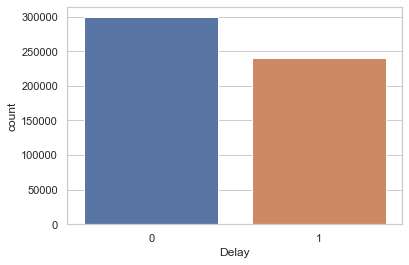

In [18]:

import seaborn as sns
sns.set_theme(style="whitegrid")
sns.countplot(data=df, x="Delay")

From the above analysis, We can observe that we almost have the same values in both delays and non delays.

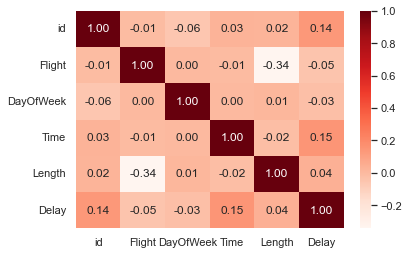

In [19]:
# Analysis of the dataset
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds, fmt='.2f')
plt.show()

From the above heatmap, we can see that the correlation between the variables is very less, which indicates that the delay of the airlines is not much effected by the other variables. The biggest is time, which shows that time effects the delay of the airways.

<AxesSubplot:xlabel='DayOfWeek', ylabel='count'>

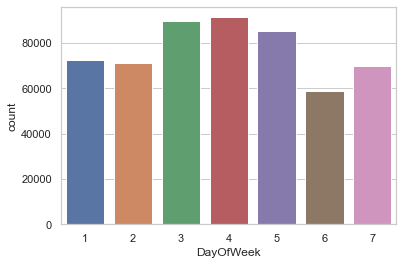

In [20]:
sns.set_theme(style="whitegrid")
sns.countplot(data=df, x="DayOfWeek")

We can see that the flights have good distribution over the week. We can take 1 to 7 values of the week as Monday to Sunday.
As there is no much difference in the count for all days. But we can observe wednesday and thursday are the days with more delays.

C:\Users\kotas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Length'>

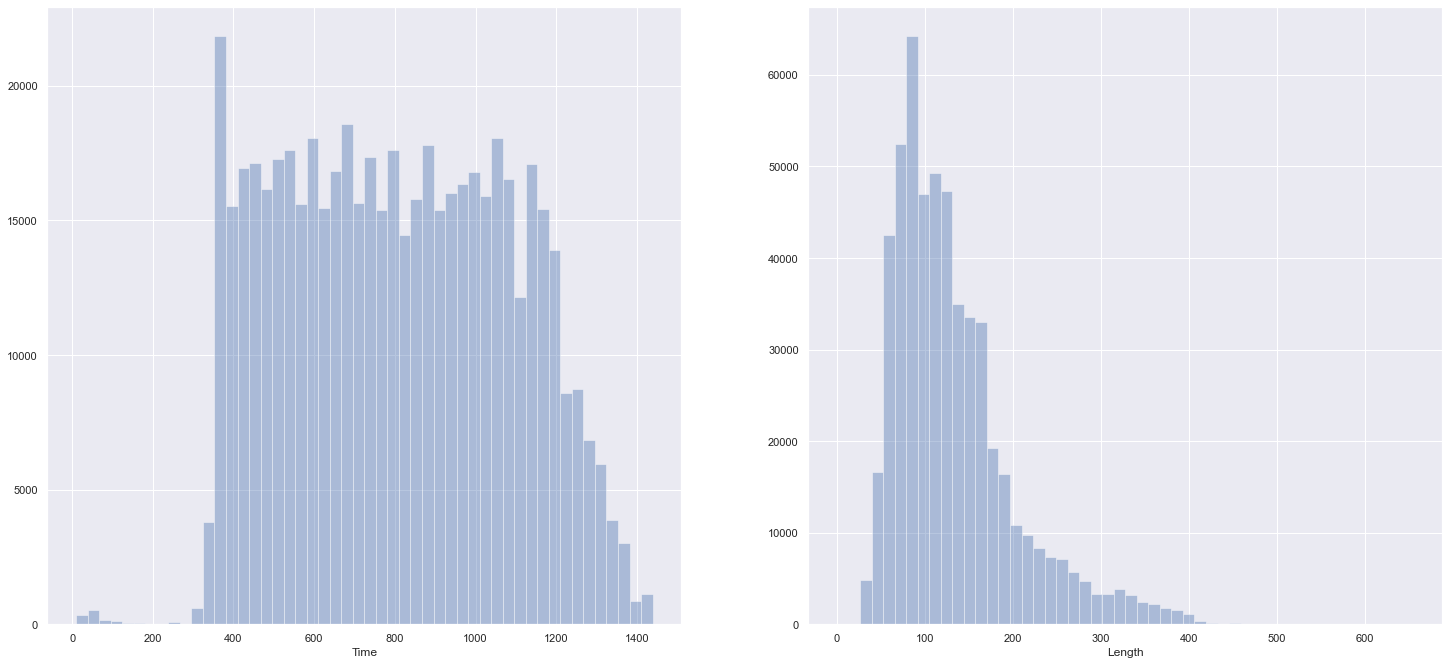

In [21]:
plt.figure(figsize = (25,25))

sns.set(color_codes = True)

plt.subplot(2,2,1)
sns.distplot(df.Time, kde = False)

plt.subplot(2,2,2)
sns.distplot(df.Length, kde = False)

We can see that time has good distribution. Where as Length of flights is usually between 100 and 200, mostly around 150

<AxesSubplot:xlabel='Airline', ylabel='count'>

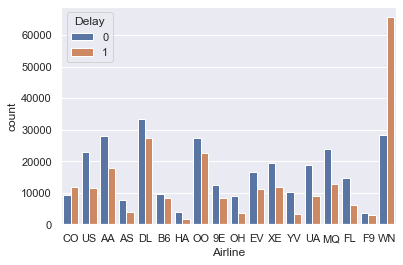

In [22]:
sns.countplot(x = 'Airline',hue = 'Delay', data = df)

Summary of the data:

1. In the data we have both numerical and categorical variables. Target variable(Delay) is binary.
2. We have 539383 rows and 9 features in the data.
3. We have the data of 18 Airlines.
4. We can see that we almost have the same values in both delays and non delays.
5. From the heatmap, we can see that the correlation between the variables is very less, which indicates that the delay of the airlines is not much effected by the other variables. Among the variables, the biggest is time, which shows that time effects the delay of the airways.
6. There is negative correlation between flight and length of the flight which indicates that delay is less if length of the flight is more.
7. We can see that the flights have good distribution over the week. As there is no much difference in the count for all days. But we can observe wednesday and thursday are the days with more delays.
8. We ca observe that length of flights is usually between 100 and 200, mostly around 150.
9. Among all the airlines, we are most likely that our flight gets delayed is from the WN airport.

In [23]:
# training data and testing data
X_train, X_test, y_train, y_test =  train_test_split(X_standard, y, test_size=0.2, random_state=42)

In [24]:
#Model1 - logistic regression model
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=4)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=4)

In [25]:
pred_prob = log_reg.predict_proba(X_test)
pred_prob

array([[0.51059398, 0.48940602],
       [0.72870668, 0.27129332],
       [0.31632318, 0.68367682],
       ...,
       [0.55113709, 0.44886291],
       [0.60383771, 0.39616229],
       [0.48447385, 0.51552615]])

In [26]:
roc_auc_score(y_test, pred_prob[:,1])

0.6926950829233888

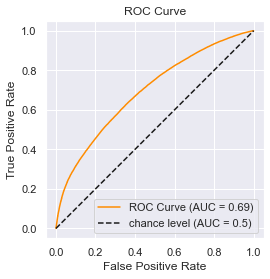

In [27]:
RocCurveDisplay.from_predictions(
    y_test,
    pred_prob[:, 1],
    name='ROC Curve',
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [28]:
from sklearn.metrics import confusion_matrix

prediction_prob=log_reg.predict(X_test)

prediction =list(map(round, prediction_prob))
confusion_matrix(y_test, prediction)

array([[46415, 13464],
       [24686, 23312]], dtype=int64)

In [29]:
#Model2 - light gbm model
!pip install lightgbm
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier

param_grid = {
 'n_estimators':[20, 50],
 'learning_rate':[0.1, 0.01]
}

In [30]:
model_lgb = GridSearchCV(estimator = LGBMClassifier( boosting_type='gbdt'), 
param_grid = param_grid, scoring='roc_auc')

In [31]:
lgb_model = model_lgb.fit(X_train, y_train)

In [32]:
preds = lgb_model.predict_proba(X_test)
print(roc_auc_score(y_test, preds[:,1]))

0.7069686364550332


In [33]:
#Model 3 - neural networks
import torch
from torch import nn, optim
from sklearn.model_selection import train_test_split

data = pd.read_csv('Airlines.csv')
categorical = ['Airline','AirportFrom','AirportTo']
dummy_data = pd.get_dummies(data[categorical], drop_first = True)
dummy_data
num_data = ['Flight','DayOfWeek','Time','Length']
X = pd.concat([data[num_data], dummy_data], axis=1)

y=data['Delay']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
X_train = torch.tensor(X_train.values, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.float32).reshape(-1, 1)
X_test = torch.tensor(X_test.values, dtype=torch.float32)
y_test = torch.tensor(y_test.values, dtype=torch.float32).reshape(-1, 1)

In [36]:
class AirlineDelayModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.fc3 = nn.Linear(hidden_dim, output_dim)
        self.relu = nn.ReLU()
        
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        return x

In [37]:
input_dim = X_train.shape[1]
hidden_dim = 10
output_dim = 1
lr = 0.0001
epochs = 150

In [38]:
model = AirlineDelayModel(input_dim, hidden_dim, output_dim)
optimizer = optim.Adam(model.parameters(), lr=lr)

In [39]:
criterion = nn.MSELoss()

In [40]:
# Train the model
for epoch in range(epochs):
    optimizer.zero_grad()
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)
    loss.backward()
    optimizer.step()
    if epoch % 10 == 0:
        print(f'Epoch {epoch}, Loss {loss.item():.4f}')

Epoch 0, Loss 1.9572
Epoch 10, Loss 1.6051
Epoch 20, Loss 1.3369
Epoch 30, Loss 1.1318
Epoch 40, Loss 0.9759
Epoch 50, Loss 0.8571
Epoch 60, Loss 0.7268
Epoch 70, Loss 0.5836
Epoch 80, Loss 0.3896
Epoch 90, Loss 0.2717
Epoch 100, Loss 0.2750
Epoch 110, Loss 0.2601
Epoch 120, Loss 0.2555
Epoch 130, Loss 0.2525
Epoch 140, Loss 0.2499


In [41]:
with torch.no_grad():
    y_pred = model(X_test)
    test_loss = criterion(y_pred, y_test)
    print(f'Test Loss: {test_loss.item():.4f}')

Test Loss: 0.2477


In [42]:
from sklearn.metrics import roc_auc_score, confusion_matrix, RocCurveDisplay
from sklearn.metrics import auc
print(roc_auc_score(y_test, y_pred))

0.5721935736227747


AUC of all 3 models
Model1 - Logistic regression AUC : 0.69,
Model2 - Light gbm AUC - 0.707,
Model3 - Neural Network AUC - 0.576

Light gbm model(Model2) has the more AUC compared to remaning 2 models, so comparitively model2 has the good output for this dataset.

Summary of the models:
1. After scaling the data, the scaled data can't be used for the neural network model, so I used the original dataset values.
2. After scaling the data, we get good results for logistic regression and light gbm models. Standard scaler is used for scaling the data.
3. Eventhough after scaling the data, we didn't get the results as expected. Logistic and Lightgbm models almost have the same AUC. But lightgbm model accuracy can be increased by changing the parameters.
4. The most important features are Airlines and time, which gives us the idea of the flights getting delayed or not.
5. We can run more models like random forest, xgboost, decision tree to check if they can improve the accuracy of finding the flights getting delay or not.
6. Eventhough there are no null values in the data, we didn't get the good results of predicting the delay of flights.
7. May be if we have more information on weather forecast, time of year, or the things that effect the flight timings or delays, we could get better results after running the ML models.